### 1. Noise cluster

**1.1 Sample: 100 features: 50 with detections, 50 without**

In [7]:
import pandas as pd
import numpy as np
import os
import random
import librosa
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio
import matplotlib.gridspec as gridspec
import traceback
from pathlib import Path
import warnings

In [8]:
os.getcwd()

'/home/jupyter-tommills/Nepal_Birds_TM'

In [9]:
# load dataframe for noise cluster
nb2_noise_s3 = pd.read_csv("nepalbirds2_clusternoise_sample3.csv")
nb2_noise_s3.head()

path  cluster  start_time  \
0  downloads/BZ/BZ50/PAM/2021/BZ50_20210404_14000...       -1        12.0   
1  downloads/BZ/BZ48/PAM/2021/BZ48_20210330_14000...       -1        18.0   
2  downloads/OBZ/OBZ17/PAM/2021/OBZ17_20210331_16...       -1        12.0   
3  downloads/BZ/BZ38/PAM/2021/BZ38_20210401_10000...       -1        30.0   
4  downloads/NP/NP46/PAM/2021/NP46_20210412_12000...       -1        54.0   

   end_time  detections_count  
0      15.0                 1  
1      21.0                 1  
2      15.0                 1  
3      33.0                 1  
4      57.0                 1

**1.1.1 - Review 50 features without detections**

In [10]:
#filter df to exclude detections
nb2_noise_s3_0det = nb2_noise_s3[nb2_noise_s3["detections_count"] == 0]
nb2_noise_s3_0det.head()

path  cluster  start_time  \
50  downloads/NP/NP42/PAM/2021/NP42_20210415_08000...       -1        18.0   
51  downloads/OBZ/OBZ11/PAM/2021/OBZ11_20210329_02...       -1        48.0   
52  downloads/OBZ/OBZ38/PAM/2021/OBZ38_20210324_20...       -1        54.0   
53  downloads/NP/NP17/PAM/2021/NP17_20210422_02000...       -1        45.0   
54  downloads/OBZ/OBZ15/PAM/2021/OBZ15_20210326_14...       -1        33.0   

    end_time  detections_count  
50      21.0                 0  
51      51.0                 0  
52      57.0                 0  
53      48.0                 0  
54      36.0                 0

In [11]:
nb2_noise_s3_0det.shape

(50, 5)

In [ ]:
# stop warnings
warnings.filterwarnings("ignore", message="PySoundFile failed. Trying audioread instead.")

# set base directory
base_audio_dir = Path("data/nepalbirds2_allsample3/audio")

# prepare figure and grid
fig = plt.figure(figsize=(22, 26))
gs = gridspec.GridSpec(10, 6, width_ratios=[1]*5 + [0.05], wspace=0.3, hspace=0.6)
fig.suptitle("Spectrogram Segments (detections_count = 0)", fontsize=24)

# track image
last_im = None
plotted = 0

# loop through rows in df
for idx, row in nb2_noise_s3_0det.iterrows():
    if plotted >= 50:
        break
    rel_path = Path(row['path'])
    full_path = base_audio_dir / rel_path
    if full_path.is_file():
        audio_path = full_path
    else:
        filename = rel_path.name
        matches = list(base_audio_dir.rglob(filename))
        if matches:
            audio_path = matches[0]
        else:
            print(f"file missing: {filename}")
            continue
    start_sec = row['start_time']
    end_sec = row['end_time']
    duration = end_sec - start_sec
    try:
        
        # load trimmed audio
        y, sr = librosa.load(str(audio_path), sr=None, offset=start_sec, duration=duration)

        # compute STFT and convert to dB
        S = librosa.stft(y)
        S_db = librosa.amplitude_to_db(np.abs(S))

        # plot grid
        row_idx = plotted // 5
        col_idx = plotted % 5
        ax = fig.add_subplot(gs[row_idx, col_idx])
        im = librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='hz', cmap='viridis', ax=ax)
        ax.set_ylim(0, 15000)
        ax.set_title("")
        ax.set_xlabel("")
        ax.set_ylabel("")
        ax.set_xticks([])
        ax.set_yticks([])
        ax.tick_params(left=False, bottom=False)
        ax.tick_params(labelsize=6)
        fig.supxlabel("Freq (Hz) - max 15,000 Hz", fontsize=24)
        fig.supylabel("Time (s) - 3 sec segments)", fontsize=24)
        last_im = im
        plotted += 1

    except Exception as e:
        print(f"error {audio_path}:")
        traceback.print_exc()

# colorbar
if last_im:
    cbar_ax = fig.add_subplot(gs[:, 5])
    cbar = fig.colorbar(last_im, cax=cbar_ax)
    cbar.set_label('Amplitude (dB)', fontsize=24)

# layout 
plt.savefig('Spectrograms_noise cluster without BirdNET detections.png', dpi=300, bbox_inches='tight')  # Export with high resolution
plt.tight_layout(rect=[0, 0, 1, 0.96])

In [ ]:
# play audio for each section in that grid

**1.1.2 - Review 50 features with detections**

In [ ]:
#filter df to only include detections
nb2_noise_s3_anydet = nb2_noise_s3[nb2_noise_s3["detections_count"] > 0]
nb2_noise_s3_anydet.head()

In [ ]:
nb2_noise_s3_anydet.shape

In [ ]:
# stop warnings
warnings.filterwarnings("ignore", message="PySoundFile failed. Trying audioread instead.")

# set base directory
base_audio_dir = Path("data/nepalbirds2_allsample3/audio")

# prepare figure and grid
fig = plt.figure(figsize=(22, 26))
gs = gridspec.GridSpec(10, 6, width_ratios=[1]*5 + [0.05], wspace=0.3, hspace=0.6)
fig.suptitle("Spectrogram Segments (detections_count > 0)", fontsize=24)

# track image
last_im = None
plotted = 0

# loop through rows in df
for idx, row in nb2_noise_s3_anydet.iterrows():
    if plotted >= 50:
        break
    rel_path = Path(row['path'])
    full_path = base_audio_dir / rel_path
    if full_path.is_file():
        audio_path = full_path
    else:
        filename = rel_path.name
        matches = list(base_audio_dir.rglob(filename))
        if matches:
            audio_path = matches[0]
        else:
            print(f"file missing: {filename}")
            continue
    start_sec = row['start_time']
    end_sec = row['end_time']
    duration = end_sec - start_sec
    try:
        
        # load trimmed audio
        y, sr = librosa.load(str(audio_path), sr=None, offset=start_sec, duration=duration)

        # compute STFT and convert to dB
        S = librosa.stft(y)
        S_db = librosa.amplitude_to_db(np.abs(S))

        # plot grid
        row_idx = plotted // 5
        col_idx = plotted % 5
        ax = fig.add_subplot(gs[row_idx, col_idx])
        im = librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='hz', cmap='viridis', ax=ax)
        ax.set_ylim(0, 15000)
        #ax.set_title(audio_path.name, fontsize=8)
        #ax.set_xlabel("Time (s)")
        #ax.set_ylabel("Freq (Hz)")
        #ax.tick_params(labelsize=6) 
        ax.set_title("")
        ax.set_xlabel("")
        ax.set_ylabel("")
        ax.set_xticks([])
        ax.set_yticks([])
        ax.tick_params(left=False, bottom=False)
        ax.tick_params(labelsize=6)
        fig.supxlabel("Freq (Hz) - max 15,000 Hz", fontsize=24)
        fig.supylabel("Time (s) - 3 sec segments)", fontsize=24)
        last_im = im
        plotted += 1

    except Exception as e:
        print(f"error {audio_path}:")
        traceback.print_exc()

# colorbar
if last_im:
    cbar_ax = fig.add_subplot(gs[:, 5])
    cbar = fig.colorbar(last_im, cax=cbar_ax)
    cbar.set_label('Amplitude (dB)', fontsize=24)

# layout and save
plt.savefig('Spectrograms_noise cluster with BirdNET detections.png', dpi=300, bbox_inches='tight')  # Export with high resolution
plt.tight_layout(rect=[0, 0, 1, 0.96])

### 2. Other clusters

In [ ]:
# load dataframe for other cluster
nb2_clusters_s3 = pd.read_csv("nepalbirds2_clusters_sample3.csv")
nb2_clusters_s3.head()

In [ ]:
nb2_clusters_s3.shape

In [ ]:
# count unique clusters
nb2_clusters_s3['cluster'].unique()

In [ ]:
# pick 4 random clusters: 
import random
random.seed(42)
#NB RS42 gives 32,1,78,53
sample4 = random.sample(nb2_clusters_s3['cluster'].unique().tolist(), 4)
print(sample4)

In [ ]:
nb2_clusters_s3_clu32 = nb2_clusters_s3[nb2_clusters_s3['cluster'] == 32]
nb2_clusters_s3_clu1 = nb2_clusters_s3[nb2_clusters_s3['cluster'] == 1]
nb2_clusters_s3_clu78 = nb2_clusters_s3[nb2_clusters_s3['cluster'] == 78]
nb2_clusters_s3_clu53 = nb2_clusters_s3[nb2_clusters_s3['cluster'] == 53]

**2.1.1 - Review spectrograms for cluster 32**

In [ ]:
# stop warnings
warnings.filterwarnings("ignore", message="PySoundFile failed. Trying audioread instead.")

# set base directory
base_audio_dir = Path("data/nepalbirds2_allsample3/audio")

# prepare figure and grid
fig = plt.figure(figsize=(22, 16))
gs = gridspec.GridSpec(4, 6, width_ratios=[1]*5 + [0.05], wspace=0.3, hspace=0.6)
fig.suptitle("Spectrogram Chunks (detections_count = 0)", fontsize=18)

# track image
last_im = None
plotted = 0
for idx, row in nb2_clusters_s3_clu32.iterrows():
    if plotted >= 20:
        break
    rel_path = Path(row['path'])
    full_path = base_audio_dir / rel_path
    if full_path.is_file():
        audio_path = full_path
    else:
        filename = rel_path.name
        matches = list(base_audio_dir.rglob(filename))
        if matches:
            audio_path = matches[0]
        else:
            print(f"File not found: {filename}")
            continue
    start_sec = row['start_time']
    end_sec = row['end_time']
    duration = end_sec - start_sec
    try:
        
        # load trimmed audio
        y, sr = librosa.load(str(audio_path), sr=None, offset=start_sec, duration=duration)

        # compute STFT and convert to dB
        S = librosa.stft(y)
        S_db = librosa.amplitude_to_db(np.abs(S))

        # Plot in grid
        row_idx = plotted // 5
        col_idx = plotted % 5
        ax = fig.add_subplot(gs[row_idx, col_idx])
        im = librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='hz', cmap='viridis', ax=ax)
        ax.set_ylim(0, 15000)
        ax.set_title(audio_path.name, fontsize=8)
        ax.set_xlabel("Time (s)", fontsize=12)
        ax.set_ylabel("Freq (Hz)", fontsize=12)
        ax.tick_params(labelsize=6)
        last_im = im
        plotted += 1

    except Exception as e:
        print(f"Error processing {audio_path}:")
        traceback.print_exc()

# colorbar
if last_im:
    cbar_ax = fig.add_subplot(gs[:, 5])
    fig.colorbar(last_im, cax=cbar_ax, label='Amplitude (dB)')

# layout and save
plt.savefig('Spectrograms_Clu_32.png', dpi=300, bbox_inches='tight')
plt.tight_layout(rect=[0, 0, 1, 0.96])

**2.1.2 - Review spectrograms for cluster 1**

/tmp/ipykernel_4095918/3314202510.py:72: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.96])


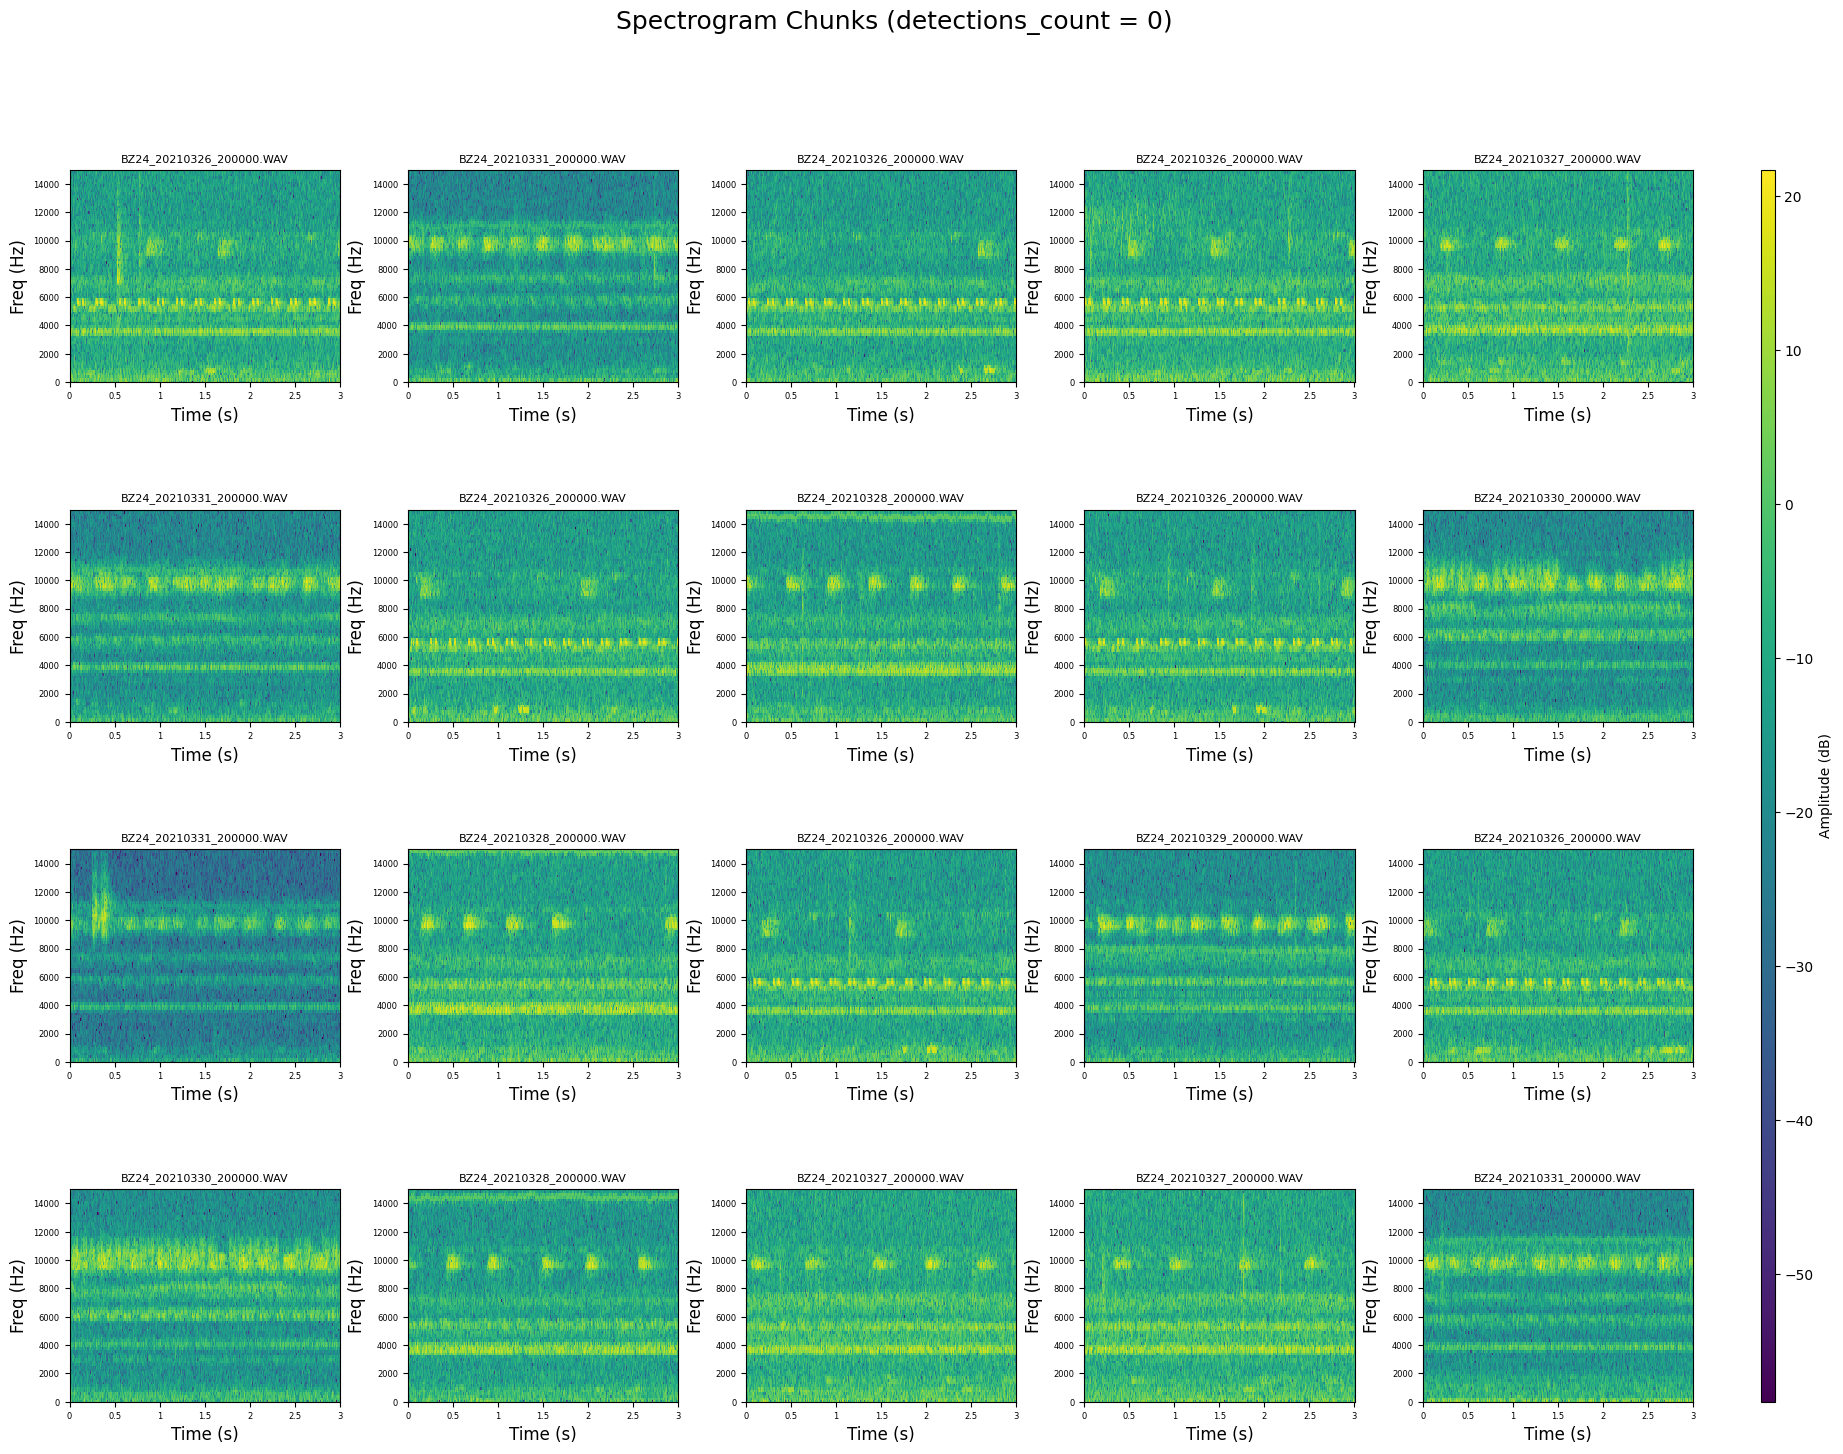

In [17]:
# stop warnings
warnings.filterwarnings("ignore", message="PySoundFile failed. Trying audioread instead.")

# set base directory
base_audio_dir = Path("data/nepalbirds2_allsample3/audio")

# prepare figure and grid
fig = plt.figure(figsize=(22, 16))
gs = gridspec.GridSpec(4, 6, width_ratios=[1]*5 + [0.05], wspace=0.3, hspace=0.6)
fig.suptitle("Spectrogram Chunks (detections_count = 0)", fontsize=18)

# track image
last_im = None
plotted = 0
for idx, row in nb2_clusters_s3_clu1.iterrows():
    if plotted >= 20:
        break
    rel_path = Path(row['path'])
    full_path = base_audio_dir / rel_path
    if full_path.is_file():
        audio_path = full_path
    else:
        filename = rel_path.name
        matches = list(base_audio_dir.rglob(filename))
        if matches:
            audio_path = matches[0]
        else:
            print(f"File not found: {filename}")
            continue
    start_sec = row['start_time']
    end_sec = row['end_time']
    duration = end_sec - start_sec
    try:
        
        # load trimmed audio
        y, sr = librosa.load(str(audio_path), sr=None, offset=start_sec, duration=duration)

        # compute STFT and convert to dB
        S = librosa.stft(y)
        S_db = librosa.amplitude_to_db(np.abs(S))

        # Plot in grid
        row_idx = plotted // 5
        col_idx = plotted % 5
        ax = fig.add_subplot(gs[row_idx, col_idx])
        im = librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='hz', cmap='viridis', ax=ax)
        ax.set_ylim(0, 15000)
        ax.set_title(audio_path.name, fontsize=8)
        ax.set_xlabel("Time (s)", fontsize=12)
        ax.set_ylabel("Freq (Hz)", fontsize=12)
        ax.tick_params(labelsize=6)
        last_im = im
        plotted += 1

    except Exception as e:
        print(f"Error processing {audio_path}:")
        traceback.print_exc()

# colorbar
if last_im:
    cbar_ax = fig.add_subplot(gs[:, 5])
    fig.colorbar(last_im, cax=cbar_ax, label='Amplitude (dB)')

# layout and save
plt.savefig('Spectrograms_Clu_32.png', dpi=300, bbox_inches='tight')
plt.tight_layout(rect=[0, 0, 1, 0.96])

**2.1.2 - Review spectrograms for cluster 78**

/tmp/ipykernel_4095918/301191310.py:72: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.96])


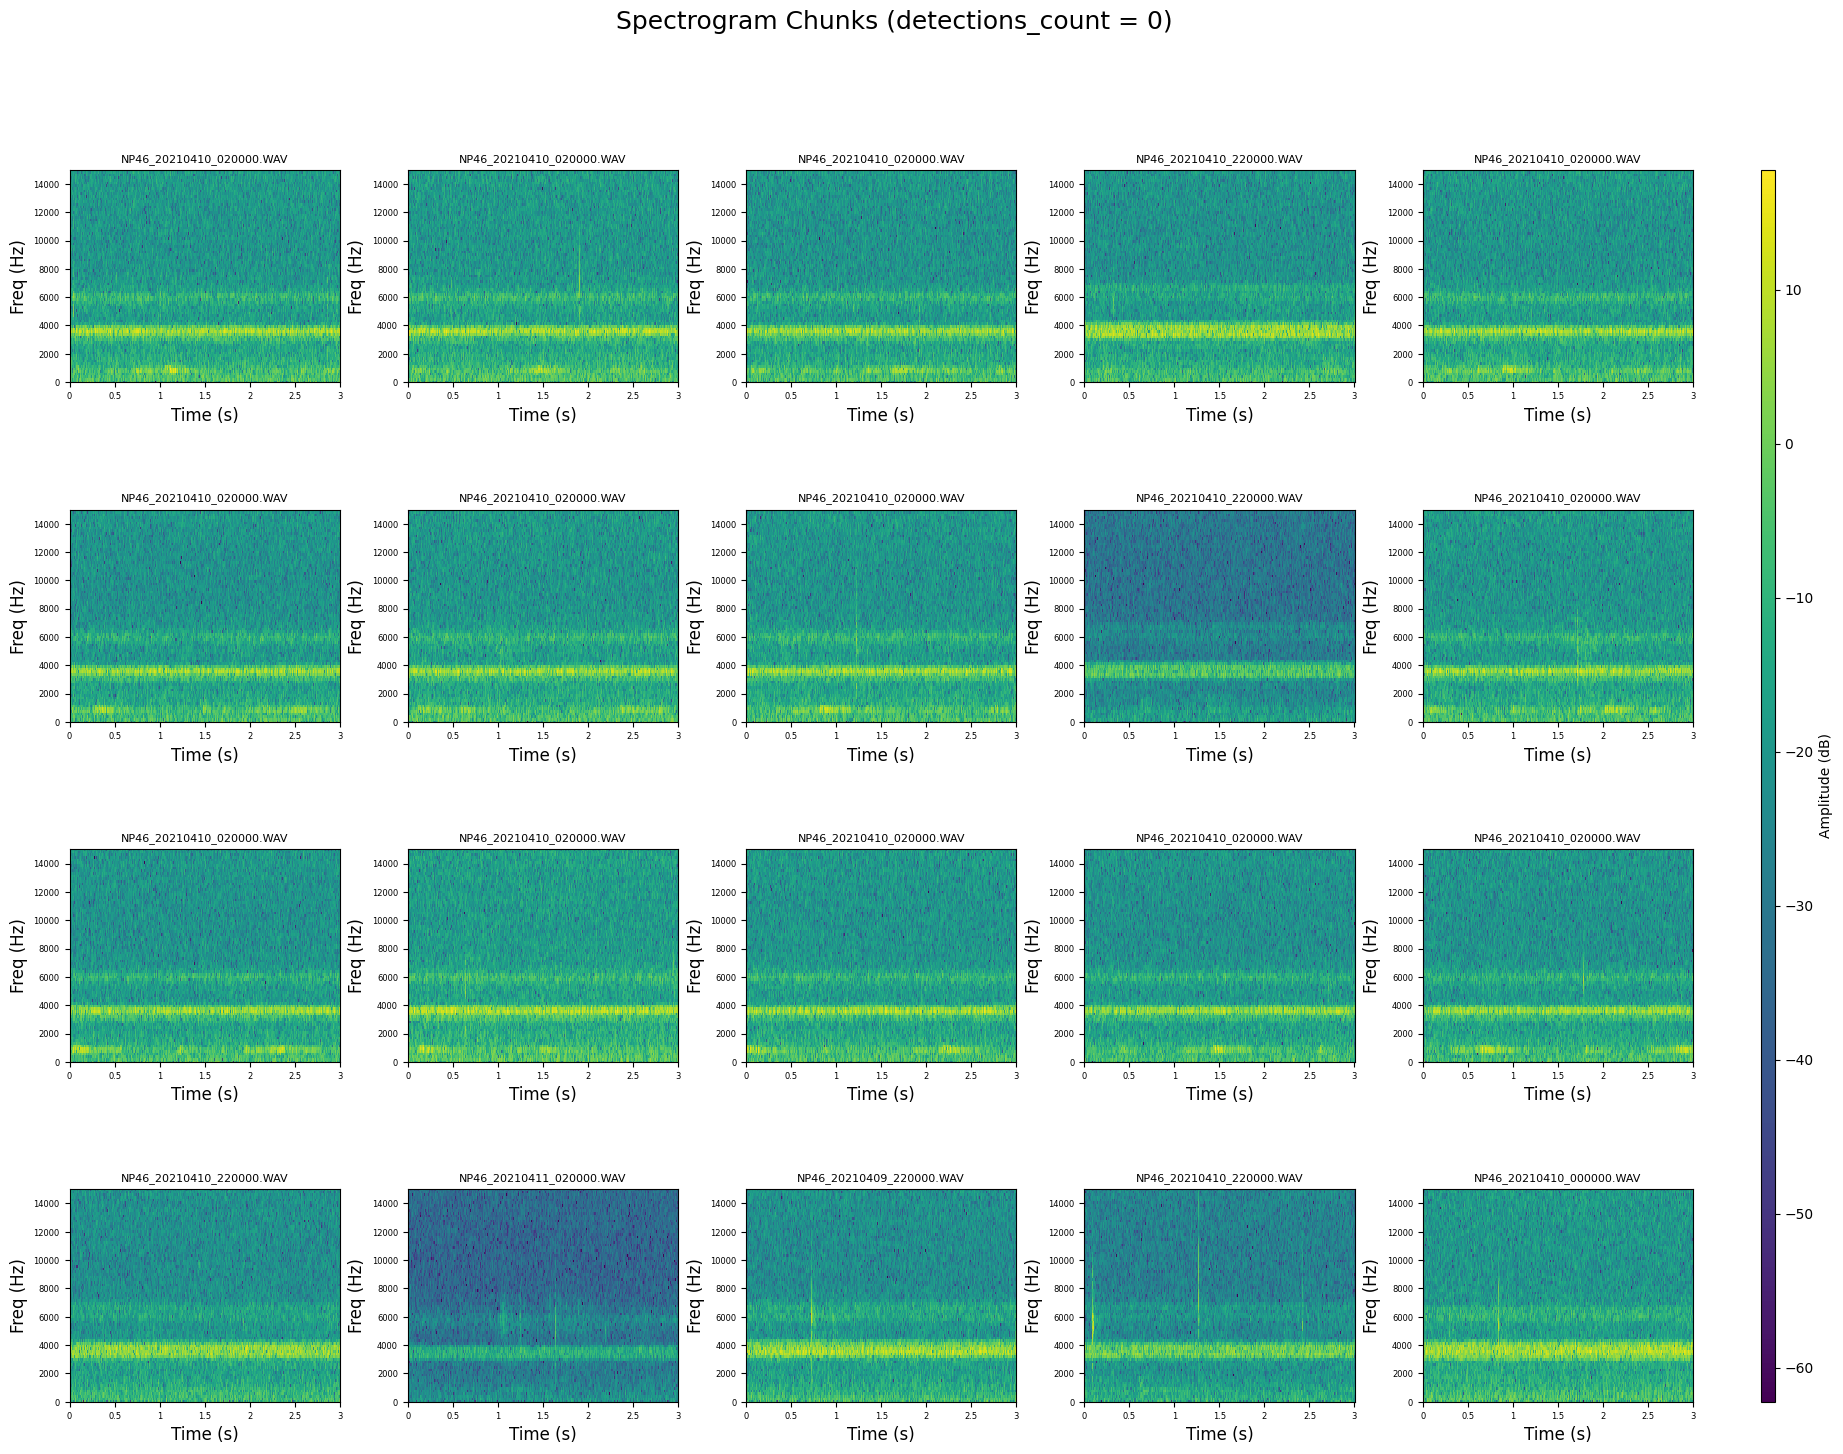

In [20]:
# Stop unnecessary warning
warnings.filterwarnings("ignore", message="PySoundFile failed. Trying audioread instead.")

# Set base directory
base_audio_dir = Path("data/nepalbirds2_allsample3/audio")

# Prepare figure and GridSpec layout: 10 rows × 6 columns (5 for plots, 1 for colorbar)
fig = plt.figure(figsize=(22, 16))  # Adjust height for 4 rows
gs = gridspec.GridSpec(4, 6, width_ratios=[1]*5 + [0.05], wspace=0.3, hspace=0.6)
fig.suptitle("Spectrogram Chunks (detections_count = 0)", fontsize=18)

# Track last image for colorbar
last_im = None
plotted = 0

# Loop through all rows in the DataFrame
for idx, row in nb2_clusters_s3_clu78.iterrows():
    if plotted >= 20:
        break

    # Try full relative path first
    rel_path = Path(row['path'])
    full_path = base_audio_dir / rel_path

    if full_path.is_file():
        audio_path = full_path
    else:
        # Fallback: search by filename only
        filename = rel_path.name
        matches = list(base_audio_dir.rglob(filename))
        if matches:
            audio_path = matches[0]
        else:
            print(f"File not found: {filename}")
            continue

    start_sec = row['start_time']
    end_sec = row['end_time']
    duration = end_sec - start_sec

    try:
        # Load trimmed audio
        y, sr = librosa.load(str(audio_path), sr=None, offset=start_sec, duration=duration)

        # Compute STFT and convert to dB
        S = librosa.stft(y)
        S_db = librosa.amplitude_to_db(np.abs(S))

        # Plot in grid
        row_idx = plotted // 5
        col_idx = plotted % 5
        ax = fig.add_subplot(gs[row_idx, col_idx])
        im = librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='hz', cmap='viridis', ax=ax)
        ax.set_ylim(0, 15000)
        ax.set_title(audio_path.name, fontsize=8)
        ax.set_xlabel("Time (s)", fontsize=12)
        ax.set_ylabel("Freq (Hz)", fontsize=12)
        ax.tick_params(labelsize=6)
        last_im = im
        plotted += 1

    except Exception as e:
        print(f"Error processing {audio_path}:")
        traceback.print_exc()

# Add shared colorbar
if last_im:
    cbar_ax = fig.add_subplot(gs[:, 5])
    fig.colorbar(last_im, cax=cbar_ax, label='Amplitude (dB)')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('Spectrograms_Clu_78.png', dpi=300, bbox_inches='tight')

**2.1.2 - Review spectrograms for cluster 53**

/tmp/ipykernel_4095918/1659465510.py:72: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.96])# Add shared colorbar


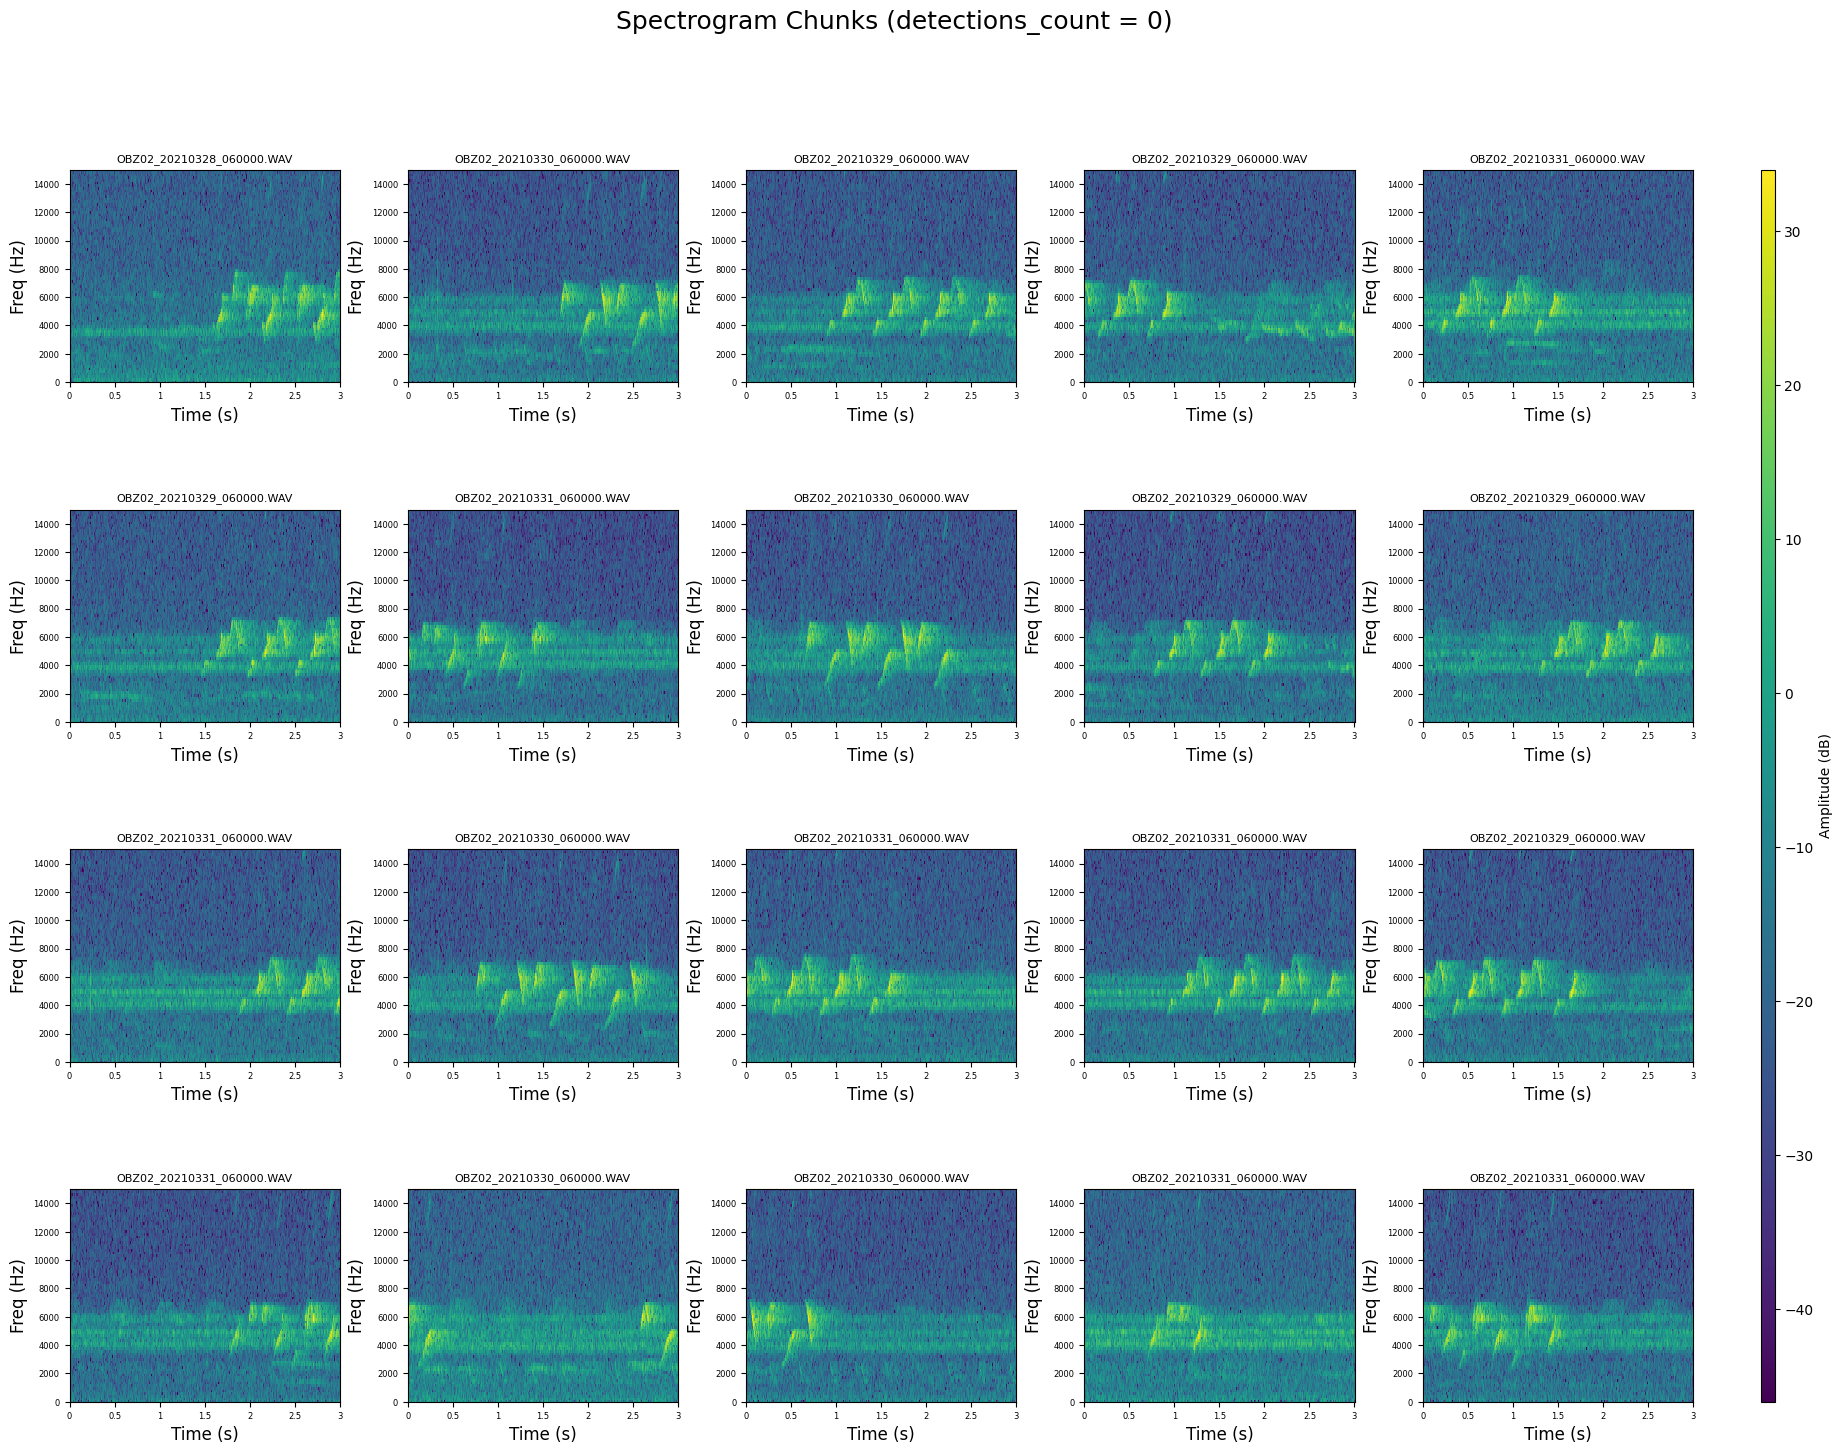

In [19]:
# Stop unnecessary warning
warnings.filterwarnings("ignore", message="PySoundFile failed. Trying audioread instead.")

# Set base directory
base_audio_dir = Path("data/nepalbirds2_allsample3/audio")

# Prepare figure and GridSpec layout: 10 rows × 6 columns (5 for plots, 1 for colorbar)
fig = plt.figure(figsize=(22, 16))  # Adjust height for 4 rows
gs = gridspec.GridSpec(4, 6, width_ratios=[1]*5 + [0.05], wspace=0.3, hspace=0.6)
fig.suptitle("Spectrogram Chunks (detections_count = 0)", fontsize=18)

# Track last image for colorbar
last_im = None
plotted = 0

# Loop through all rows in the DataFrame
for idx, row in nb2_clusters_s3_clu53.iterrows():
    if plotted >= 20:
        break

    # Try full relative path first
    rel_path = Path(row['path'])
    full_path = base_audio_dir / rel_path

    if full_path.is_file():
        audio_path = full_path
    else:
        # Fallback: search by filename only
        filename = rel_path.name
        matches = list(base_audio_dir.rglob(filename))
        if matches:
            audio_path = matches[0]
        else:
            print(f"File not found: {filename}")
            continue

    start_sec = row['start_time']
    end_sec = row['end_time']
    duration = end_sec - start_sec

    try:
        # Load trimmed audio
        y, sr = librosa.load(str(audio_path), sr=None, offset=start_sec, duration=duration)

        # Compute STFT and convert to dB
        S = librosa.stft(y)
        S_db = librosa.amplitude_to_db(np.abs(S))

        # Plot in grid
        row_idx = plotted // 5
        col_idx = plotted % 5
        ax = fig.add_subplot(gs[row_idx, col_idx])
        im = librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='hz', cmap='viridis', ax=ax)
        ax.set_ylim(0, 15000)
        ax.set_title(audio_path.name, fontsize=8)
        ax.set_xlabel("Time (s)", fontsize=12)
        ax.set_ylabel("Freq (Hz)", fontsize=12)
        ax.tick_params(labelsize=6)
        last_im = im
        plotted += 1

    except Exception as e:
        print(f"Error processing {audio_path}:")
        traceback.print_exc()

# Add shared colorbar
if last_im:
    cbar_ax = fig.add_subplot(gs[:, 5])
    fig.colorbar(last_im, cax=cbar_ax, label='Amplitude (dB)')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])# Add shared colorbar
plt.savefig('Spectrograms_Clu_53.png', dpi=300, bbox_inches='tight')